In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
dataVPG = pd.read_csv('~/Documents/reinforcement_learning/VPG/progress.csv', sep = ',', engine = 'python')
dataTNPG = pd.read_csv('~/Documents/reinforcement_learning/TNPG/progress.csv', sep = ',', engine = 'python')
dataREPS = pd.read_csv('~/Documents/reinforcement_learning/REPS/progress.csv', sep = ',', engine = 'python')
dataTRPO = pd.read_csv('~/Documents/reinforcement_learning/TRPO/progress.csv', sep = ',', engine = 'python')
dataCEM = pd.read_csv('~/Documents/reinforcement_learning/CEM/progress.csv', sep = ',', engine = 'python')
dataCMAES = pd.read_csv('~/Documents/reinforcement_learning/CMAES/progress.csv', sep = ',', engine = 'python')

In [9]:
dataTRPO.head()

,dLoss,AverageReturn,NumTrajs,LossAfter,AverageDiscountedReturn,MaxReturn,MeanKLBefore,Iteration,StdReturn,MinReturn,LossBefore,Perplexity,ExplainedVariance,Entropy,MeanKL
0,0.015577,19.307692,208,-0.015577,17.305026,61.0,-3.519273e-19,0,9.225359,8.0,3.461153e-16,1.973208,1.508279e-10,0.679661,0.005442
1,0.020173,22.778409,176,-0.020173,19.842837,95.0,3.044815e-19,1,12.906208,9.0,-1.624349e-16,1.985817,-3.319496e-03,0.686030,0.007233
2,0.028879,26.576159,151,-0.028879,22.787057,74.0,-9.144035e-19,2,13.313558,10.0,5.876187e-17,1.979104,3.200355e-01,0.682644,0.008018
3,0.021704,41.268041,97,-0.021704,31.757865,121.0,1.975600e-18,3,26.457324,9.0,-3.816305e-17,1.939949,1.801161e-01,0.662662,0.007907
4,0.019633,55.438356,73,-0.019633,39.726859,162.0,1.361300e-18,4,33.824279,14.0,-1.377148e-17,1.900392,1.718417e-01,0.642060,0.006977


In [178]:
plt.figure(figsize = (15, 8))
plt.plot([0, 250], [200, 200], 'r', linewidth=2)

pl1 = plt.plot(dataVPG["Iteration"], dataVPG["AverageReturn"], linewidth=2, label='VPG')
pl1 = plt.plot(dataTNPG["Iteration"], dataTNPG["AverageReturn"], 'c', linewidth=2, label='TNPG')
pl1 = plt.plot(dataREPS["Iteration"], dataREPS["AverageReturn"], 'y', linewidth=2, label='REPS')
pl1 = plt.plot(dataTRPO["Iteration"], dataTRPO["AverageReturn"], 'g', linewidth=2, label='TRPO')
pl1 = plt.plot(dataCEM["Iteration"], dataCEM["AverageReturn"], 'darkorange', linewidth=2, label='CEM')
pl1 = plt.plot(dataCMAES["Iteration"], dataCMAES["AverageReturn"], 'maroon', linewidth=2, label='CMAES')
plt.xlabel("Iterations")
plt.ylabel("Average return")
plt.ylim(0, 220)
plt.legend()

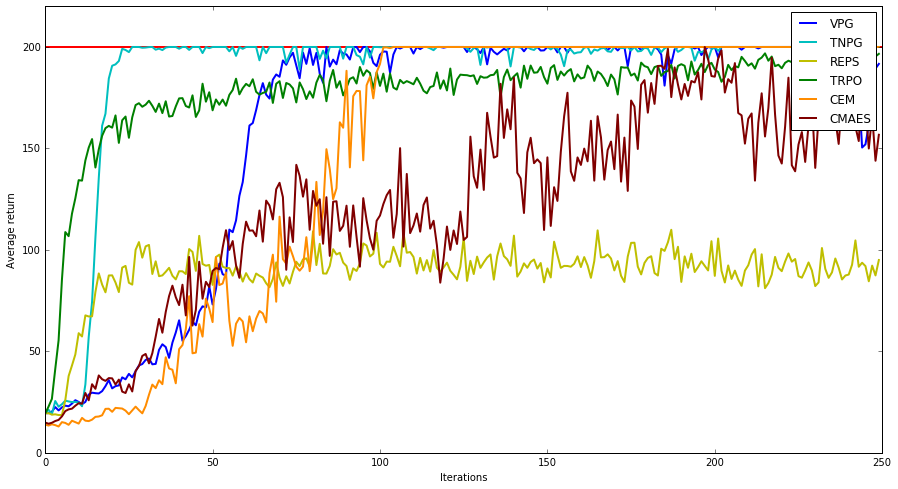

In [179]:
plt.show()

- Vanilla Policy Gradient
- Truncated Natural Policy Gradient
- Reward-Weighted Regression
- Relative Entropy Policy Search
- Trust Region Policy Optimization
- Cross Entropy Method
- Covariance Matrix Adaption Evolution Strategy

In [133]:
import json
import datetime

In [140]:
def loadJson(file):
    jsonFile = open(file)
    return json.load(jsonFile)

In [149]:
def timestamp_to_time(timestamp):
    return datetime.datetime.fromtimestamp(
        int(timestamp)
    )

In [203]:
def timeRewardPlot(jsonData, col, lab):
    episode_rewards = jsonData['episode_rewards']
    start_timestamp = timestamp_to_time(jsonData['initial_reset_timestamp'])
    timestamps = [timestamp_to_time(x) - start_timestamp for x in jsonData['timestamps']]

    plt.figure(figsize = (15, 8))
    plt.plot([ob.seconds for ob in timestamps], episode_rewards, linestyle='', marker='o', color =col, label=lab)
    plt.xlim(0, int(max(timestamps).seconds) + 20)
    plt.ylim(0, 220)
    plt.legend()
    plt.show()

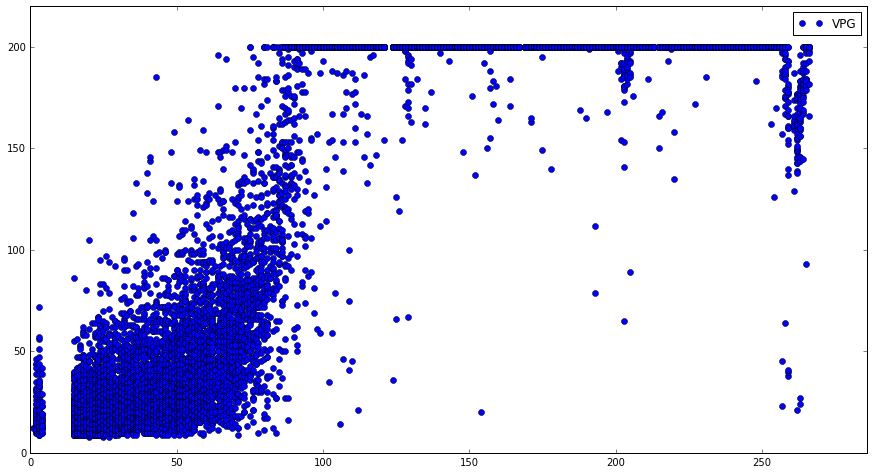

In [204]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/VPG/gym_log/openaigym.episode_batch.0.25870.stats.json")
timeRewardPlot(jsonData, 'b', 'VPG')

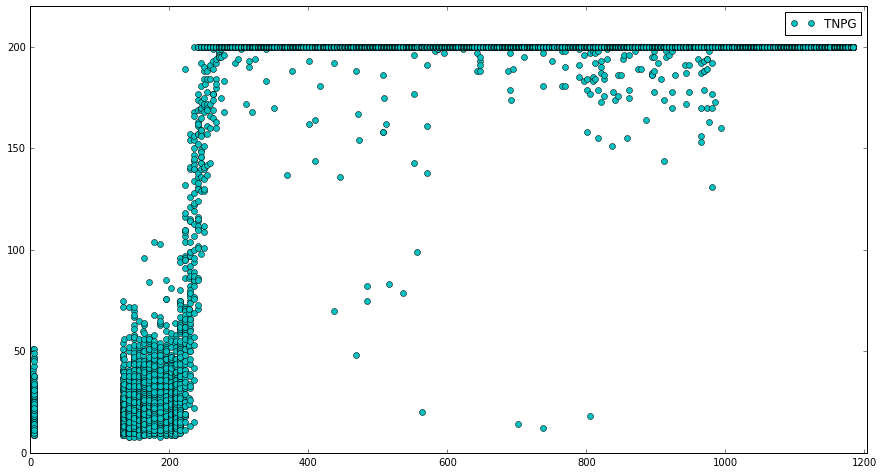

In [205]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/TNPG/gym_log/openaigym.episode_batch.0.8214.stats.json")
timeRewardPlot(jsonData, 'c', 'TNPG')

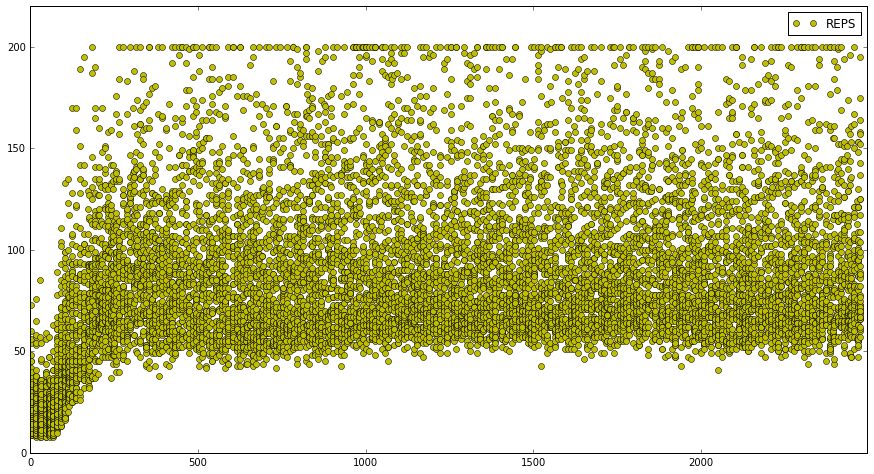

In [206]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/REPS/gym_log/openaigym.episode_batch.0.9932.stats.json")
timeRewardPlot(jsonData, 'y', 'REPS')

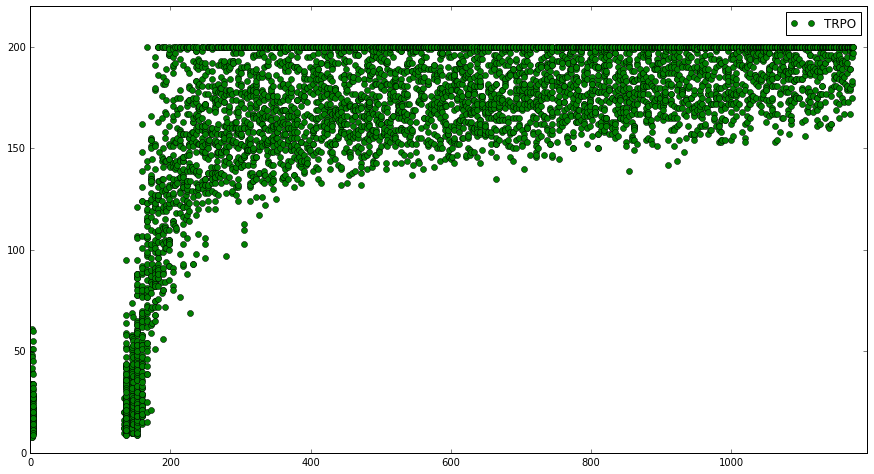

In [207]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/TRPO/gym_log/openaigym.episode_batch.0.12486.stats.json")
timeRewardPlot(jsonData, 'g', 'TRPO')

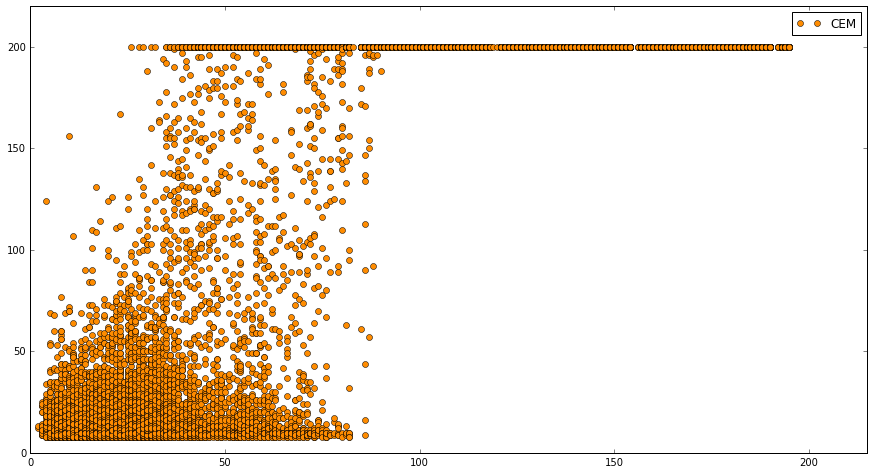

In [208]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/CEM/gym_log/openaigym.episode_batch.0.15043.stats.json")
timeRewardPlot(jsonData, 'darkorange', 'CEM')

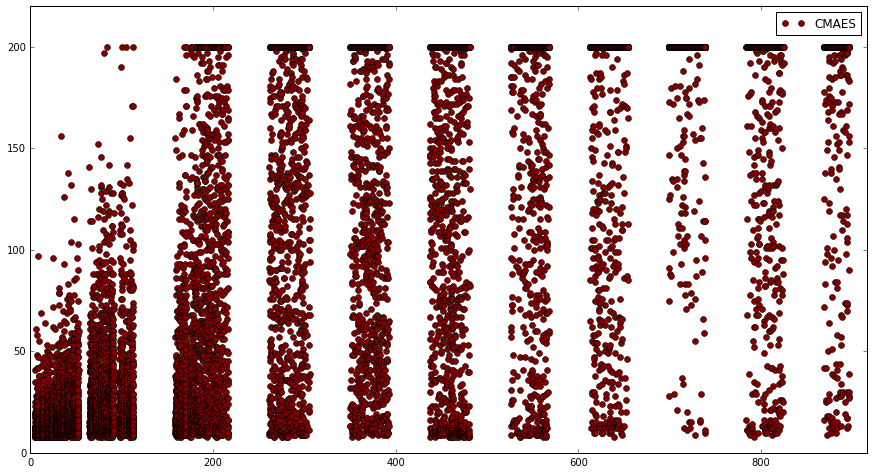

In [209]:
jsonData = loadJson("/home/joistick11/Documents/reinforcement_learning/CMAES/gym_log/openaigym.episode_batch.0.3092.stats.json")
timeRewardPlot(jsonData, 'maroon', 'CMAES')